# Lab 7

## Objectives
1. Understand dimensionality reduction by implementing PCA
2. Understanding the effect of PCA before and after application

[Tutorial1](https://towardsdatascience.com/principal-component-analysis-your-tutorial-and-code-9719d3d3f376) and [Tutorial2](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb) were used in the preparation of this manual

## Imports needed

In [1]:
# %matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_digits
import pandas as pd

import pickle
import gzip

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Read the mnist data
You can download it from [here](http://www.deeplearning.net/tutorial/gettingstarted.html)

In [2]:
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
f.close()

In [3]:
X = train_set[0]

## Compute the co-variance matrix and normalize it

In [4]:

# Compute the mean of the data
#mean_vec = np.mean(X, axis=0)

# Compute the covariance matrix
#cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)


# OR we can do this with one line of numpy:
cov_mat = np.cov(np.transpose(X))

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# print (X)

In [5]:
X.shape

(50000, 784)

## 1. Compute the eigen vectors and values
## 2. Sort them according to the highest eigen values

In [6]:
# Compute the eigen values and vectors using numpy
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print (eig_pairs[0])


(5.1082928096639275, array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.34708256e-06, -5.28019986e-06, -2.59346020e-06, -1.08060842e-07,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.93991924e-07,  1.04194465e-06,  9.81192895e-06,  2.48461836e-05,
        3.08578469e-05,  3.61464108e-05,  4.46425006e-05,  7.63668090e-05,
        8.21465945e-05,  7.52206076e-05,  8.21336866e-05,  5.57047376e-05,
        2.77331493e-05,  3.92994972e-05,  1.13433385e-05, -1.71736654e-05,
       -9.94671725e-06, -7.43801976e-06, -2.96785872e-06,  6.69612688e-07,
    

In [7]:
len(eig_pairs[0][1].shape)

1

## Choose the highest components

In [9]:

# Only keep a certain number of eigen vectors based on 
# the "explained variance percentage" which tells us how 
# much information (variance) can be attributed to each 
# of the principal components

exp_var_percentage = 95 # Threshold of 95% explained variance

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp):
    if (percentage > exp_var_percentage):
        num_vec_to_keep = index + 1
        break

print ("Number of vectors to keep", num_vec_to_keep)    



Number of vectors to keep 154


## Create the projection matrix and and project the data onto the chosen vectors

In [10]:
# Compute the projection matrix based on the top eigen vectors
num_features = X.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
  proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Project the data 
pca_data = X.dot(proj_mat)

X.shape

(50000, 784)

In [11]:
proj_mat.shape

(784, 154)

In [12]:
pca_data.shape

(50000, 154)

## Reconstruct the data

In [13]:
inverse_pca_data = np.dot(pca_data, proj_mat.T)

In [14]:
inverse_pca_data.shape

(50000, 784)

## Plot the original digit against the reconstructed 

5


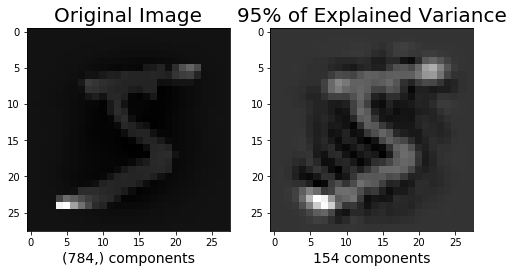

In [15]:
imageIndex = 0
plt.figure(figsize=(8,4))
print(train_set[1][imageIndex])
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(X[imageIndex].reshape(28, 28),
            cmap = plt.cm.gray,
            interpolation='nearest',
#             clim=(0, 255)
          )
plt.xlabel('{0} components'.format(X[imageIndex].shape), fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2)
plt.imshow(inverse_pca_data[imageIndex].reshape(28, 28), 
           cmap = plt.cm.gray,
           interpolation='nearest',
#            clim=(0, 255)
          )
plt.xlabel('{0} components'.format(num_vec_to_keep), fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)
plt.show()